In [2]:
import hoomd
import hoomd.md
import numpy
import sys
sys.path.append("../utils/")
import utils
import hoomd.deprecated

In [3]:
hoomd.context.initialize("")

HOOMD-blue 2.3.0 DOUBLE HPMC_MIXED SSE SSE2 SSE3 
Compiled: 04/25/18
Copyright 2009-2018 The Regents of the University of Michigan.
-----
You are using HOOMD-blue. Please cite the following:
* J A Anderson, C D Lorenz, and A Travesset. "General purpose molecular dynamics
  simulations fully implemented on graphics processing units", Journal of
  Computational Physics 227 (2008) 5342--5359
* J Glaser, T D Nguyen, J A Anderson, P Liu, F Spiga, J A Millan, D C Morse, and
  S C Glotzer. "Strong scaling of general-purpose molecular dynamics simulations
  on GPUs", Computer Physics Communications 192 (2015) 97--107
-----
HOOMD-blue is running on the CPU


In [4]:
#Lx = 20
#a = hoomd.data.boxdim(Lx = Lx, Ly = Lx, Lz = Lx)
#N = utils.ParticleCalc(0.01,Lx)
#print(N)

In [5]:
#snapshot = hoomd.data.make_snapshot(N=N, box = a,
#                                   particle_types=['A'])

In [6]:
#hoomd.deprecated.init.create_random(N, phi_p=None, name='A', min_dist=0.7, box=None, seed=1, dimensions=3)

sim = hoomd.deprecated.init.create_random(N = 100, phi_p = 0.1, name = 'A', dimensions = 3)

notice(2): Group "all" created containing 100 particles


In [7]:
# for i in range(N):
#    snapshot.particles.position[i] = utils.randNumGen(Lx)
# print(snapshot.particles.position)

In [8]:
# my_velocity = numpy.random.random((N,3)) * 2 - 1
# sim.velocity[:] = my_velocity[:]

In [9]:
#snapshot.particles.mass[:] = 1.0

In [10]:
#hoomd.init.read_snapshot(snapshot)

In [11]:
nl = hoomd.md.nlist.cell()

In [12]:
lj = hoomd.md.pair.lj(r_cut = 3.0, nlist = nl)
lj.set_params(mode="xplor")

In [13]:
lj.pair_coeff.set('A', 'A', epsilon = 1.0, sigma = 1.0)

In [14]:
hoomd.md.integrate.mode_standard(0.005)

In [15]:
all = hoomd.group.all()
integrater = hoomd.md.integrate.nvt(group = all, kT = 0.9, tau = 0.5)
integrater.randomize_velocities(123)

In [16]:
hoomd.analyze.log(filename = "DensityAttempt2-output.log",
                 quantities = ['potential_energy', 'temperature'],
                 period = 100,
                 overwrite = True)

In [17]:
hoomd.dump.gsd("DensityAttempt2Outputs.gsd", period = 500, group = all, overwrite = True)
hoomd.dump.gsd("DensityAttempt2Inputs.gsd", period = None, group = all, overwrite = True)

In [18]:
hoomd.run(10000)

notice(2): -- Neighborlist exclusion statistics -- :
notice(2): Particles with 0 exclusions             : 100
notice(2): Neighbors included by diameter          : no
notice(2): Neighbors excluded when in the same body: no
** starting run **
Time 00:00:02 | Step 10000 / 10000 | TPS 8972.21 | ETA 00:00:00
Average TPS: 8958.12
---------
-- Neighborlist stats:
718 normal updates / 100 forced updates / 0 dangerous updates
n_neigh_min: 0 / n_neigh_max: 42 / n_neigh_avg: 17.31
shortest rebuild period: 3
-- Cell list stats:
Dimension: 2, 2, 2
n_min    : 4 / n_max: 21 / n_avg: 12.5
** run complete **


In [19]:
from matplotlib import pyplot
data = numpy.genfromtxt(fname='DensityAttempt2-output.log', skip_header = True)

Text(0,0.5,'potential_energy')

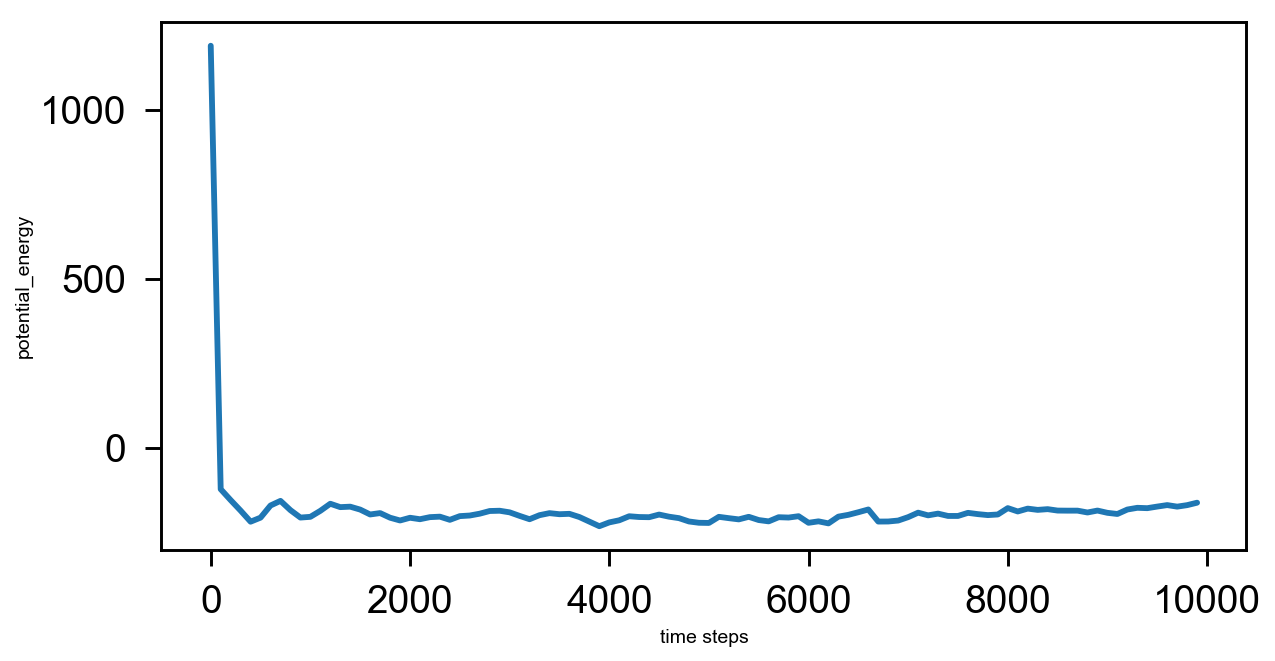

In [20]:
pyplot.figure(figsize=(10,5), dpi = 140)
pyplot.plot(data[:,0], data[:,1])
pyplot.xlabel('time steps')
pyplot.ylabel('potential_energy')

Text(0,0.5,'temperature')

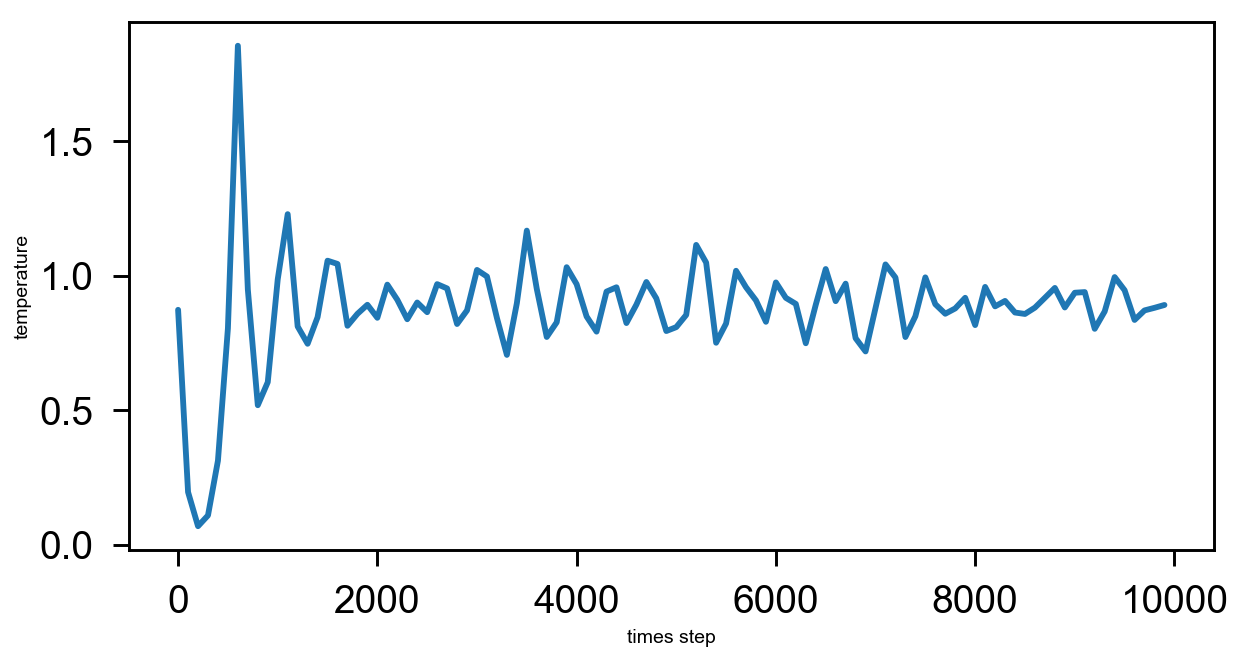

In [21]:
pyplot.figure(figsize=(10,5), dpi = 140)
pyplot.plot(data[:,0], data[:,2])
pyplot.xlabel('times step')
pyplot.ylabel('temperature')